Finding significant alpha to beat the market

# Library

In [35]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from scipy import stats #help(stats.linregress)
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
spy_etf=web.DataReader('SPY','yahoo') #ETF represents S&P500

In [11]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-06-22 to 2020-06-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [12]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-22,212.589996,211.639999,211.910004,211.889999,70696000.0,191.831482
2015-06-23,212.440002,211.570007,212.139999,212.039993,68476800.0,191.967300
2015-06-24,212.169998,210.470001,211.720001,210.500000,92307300.0,190.573059
2015-06-25,211.250000,209.770004,211.100006,209.860001,97107400.0,189.993637
2015-06-26,210.580002,209.160004,210.289993,209.820007,104174800.0,189.957413


In [15]:
start =pd.to_datetime('2015-06-22')
end=pd.to_datetime('2020-06-19')

In [41]:
AAPL= web.DataReader('TSLA','yahoo',start,end)

In [42]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-22,264.399994,255.690002,262.149994,259.790009,4561100,259.790009
2015-06-23,268.000000,258.570007,260.320007,267.670013,3870800,267.670013
2015-06-24,267.350006,263.720001,266.980011,265.170013,2412300,265.170013
2015-06-25,271.410004,265.250000,266.450012,268.790009,2849200,268.790009
2015-06-26,269.109985,266.000000,268.890015,267.089996,3838400,267.089996


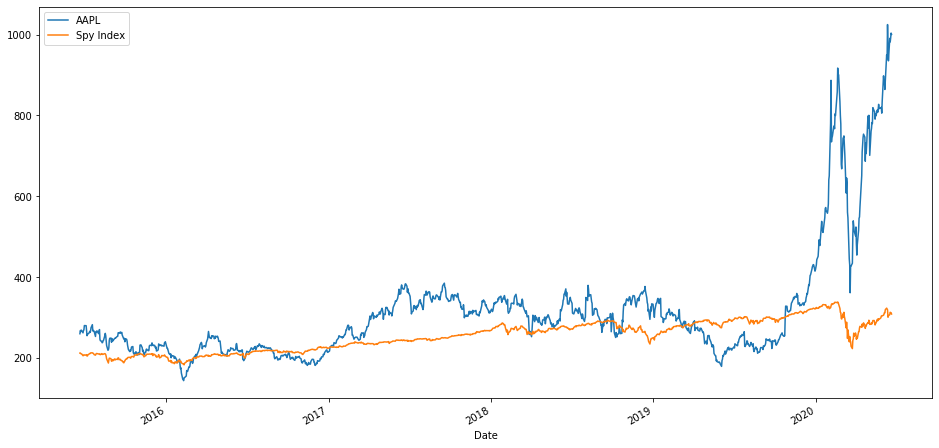

In [43]:
AAPL['Close'].plot(label='AAPL',figsize=(16,8))
spy_etf['Close'].plot(label='Spy Index')
plt.legend()

### Cumulative Returns

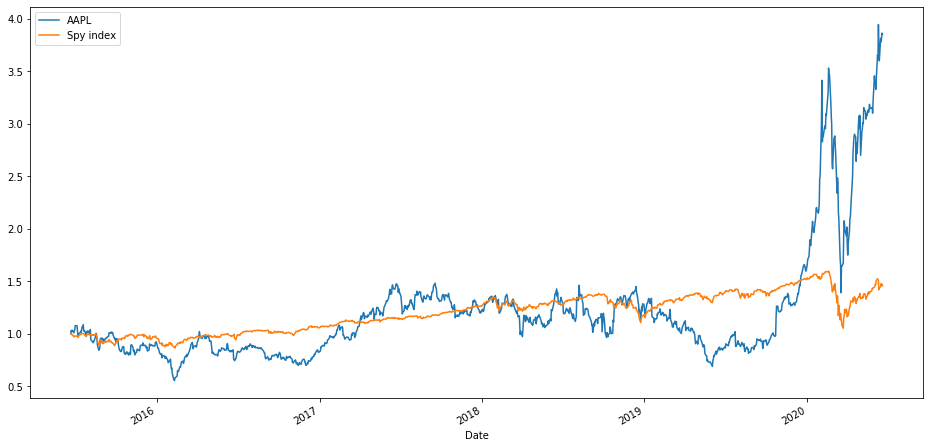

In [44]:
AAPL['Cumulative']=AAPL['Close']/AAPL['Close'].iloc[0]
spy_etf['Cumulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]

AAPL['Cumulative'].plot(label='AAPL',figsize=(16,8))
spy_etf['Cumulative'].plot(label='Spy index')
plt.legend()

### Daily Returns


In [45]:
AAPL['Daily Return']=AAPL['Close'].pct_change(1)
spy_etf['Daily Return']=spy_etf['Close'].pct_change(1)

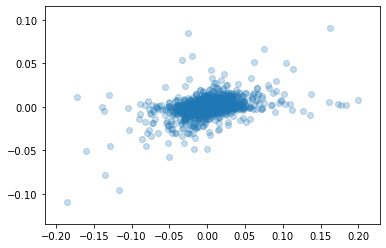

In [46]:
plt.scatter(AAPL['Daily Return'],spy_etf['Daily Return'],alpha=0.25)

### Beta and Alpha against the S&P 500 using stats

In [47]:
beta,alpha,r_value,p_value,std_err=stats.linregress(AAPL['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [48]:
beta 

0.1511054997940846

In [49]:
alpha

0.0001235866048496275

In algorithmic trading, we are trying to find a strategies that generate consistent and higher alpha

In [50]:
r_value

0.42503497158005166

r_value is simply the corelation between the predicted value (aapl) and the observed value(spy_etf)